# Spatial correlation analysis with Pysal

In [81]:
# this cell contains our library imports
import pandas as pd
import altair as alt
import geopandas as geopandas
import contextily as cx
import folium as folium
from pysal.viz import mapclassify
from libpysal import weights
from splot.libpysal import plot_spatial_weights
import esda as esda

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [22]:
data = pd.read_csv('brussels-data-export.csv', sep = ';', decimal = ',')

In [23]:
data = data.query('fiscal_income > 0')

<AxesSubplot:>

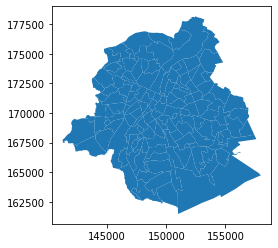

In [18]:
districts = geopandas.read_file('URBIS_ADM_MD/UrbAdm_MONITORING_DISTRICT.shp')
districts.plot()

In [19]:
districts

ID  VERSIONID  MDRC                  NAME_FRE                 NAME_DUT  \
0     83          1    83                CONSCIENCE               CONSCIENCE   
1     80          1    80                    HELMET                   HELMET   
2     19          1    19        VIEUX LAEKEN OUEST           OUD LAKEN WEST   
3     20          1    20          VIEUX LAEKEN EST           OUD LAKEN OOST   
4    800          1   800            INDUSTRIE NORD          INDUSTRIE NOORD   
..   ...        ...   ...                       ...                      ...   
140   97          1    97                   PUTDAAL                  PUTDAAL   
141   92          1    92               KAPELLEVELD              KAPELLEVELD   
142   96          1    96                SAINT-PAUL              SINT-PAULUS   
143   94          1    94                   STOCKEL                  STOKKEL   
144   95          1    95  SAINTE-ALIX  - JOLI BOIS  SINTE-ALEIDIS - MOOIBOS   

                                         NAME_BIL        AREA  \
0                                      CONSCIENCE   469489.90   
1                                          HELMET   718634.24   
2             OUD LAKEN WEST / VIEUX LAEKEN OUEST   499645.52   
3               OUD LAKEN OOST / VIEUX LAEKEN EST  1040449.92   
4                          INDUSTRIE NOORD / NORD  6733601.22   
..                                            ...         ...   
140                                       PUTDAAL   781853.24   
141                                   KAPELLEVELD  1918208.26   
142                                   ST-PAUL(US)  1782749.86   
143                             STOKKEL / STOCKEL  1516750.55   
144  ST-ALEIDIS - MOOIBOS / STE-ALIX  - JOLI BOIS   984128.27   

                      INSPIRE_ID  BEGIN_LIFE END_LIFE  \
0     BE.BRUSSELS.BRIC.ADM.MD.53  2015-10-05     None   
1     BE.BRUSSELS.BRIC.ADM.MD.54  2015-10-05     None   
2    BE.BRUSSELS.BRIC.ADM.MD.123  2015-10-05     None   
3     BE.BRUSSELS.BRIC.ADM.MD.66  2015-10-05     None   
4     BE.BRUSSELS.BRIC.ADM.MD.70  2018-01-02     None   
..                           ...         ...      ...   
140   BE.BRUSSELS.BRIC.ADM.MD.87  2015-10-05     None   
141  BE.BRUSSELS.BRIC.ADM.MD.107  2018-01-02     None   
142   BE.BRUSSELS.BRIC.ADM.MD.38  2015-10-05     None   
143  BE.BRUSSELS.BRIC.ADM.MD.135  2018-01-02     None   
144   BE.BRUSSELS.BRIC.ADM.MD.37  2018-01-02     None   

                                              geometry  
0    POLYGON ((151836.566 173466.414, 151866.597 17...  
1    POLYGON ((150764.790 173563.033, 150805.931 17...  
2    POLYGON ((147858.070 174004.707, 147866.788 17...  
3    POLYGON ((148132.120 173445.561, 148132.121 17...  
4    POLYGON ((151113.691 177049.939, 151114.596 17...  
..                                                 ...  
140  POLYGON ((154365.007 167360.572, 154371.960 16...  
141  POLYGON ((155443.251 171738.671, 155442.192 17...  
142  POLYGON ((154884.558 169524.678, 154884.633 16...  
143  POLYGON ((156936.652 170326.070, 156932.309 17...  
144  POLYGON ((156832.202 169462.109, 156894.268 16...  

[145 rows x 11 columns]

In [24]:
districts.query('ID == 83')

ID  VERSIONID  MDRC    NAME_FRE    NAME_DUT    NAME_BIL      AREA  \
0  83          1    83  CONSCIENCE  CONSCIENCE  CONSCIENCE  469489.9   

                   INSPIRE_ID  BEGIN_LIFE END_LIFE  \
0  BE.BRUSSELS.BRIC.ADM.MD.53  2015-10-05     None   

                                            geometry  
0  POLYGON ((151836.566 173466.414, 151866.597 17...

In [25]:
data.query('code == 83')

code    district  fiscal_income  monthly_rent  \
82  83.0  Conscience        12857.0         692.0   

    perc_house_with_central_heating  
82                            73.11

In [27]:
districts_joined = districts.merge(data, left_on = 'ID', right_on = 'code')

<AxesSubplot:>

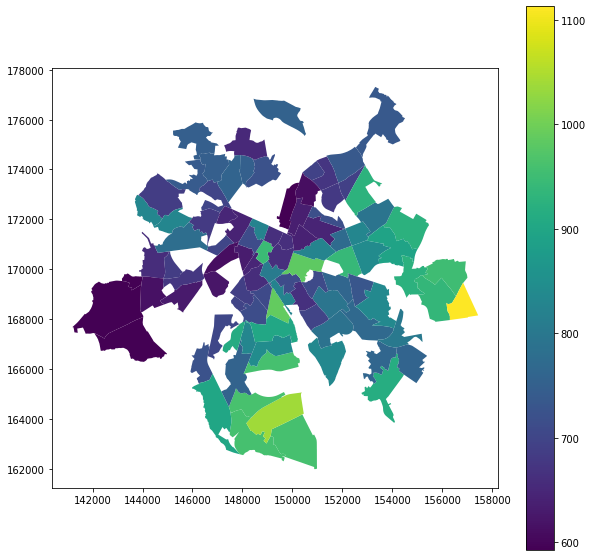

In [32]:
districts_joined.plot(column = 'monthly_rent', figsize = [10, 10], legend = True)

In [34]:
districts_joined['fiscal_income'].corr(districts_joined['monthly_rent'])

0.6670499570824638

In [35]:
chart = alt.Chart(data)
chart.mark_point().encode(
    x = 'fiscal_income',
    y = 'monthly_rent'
)

alt.Chart(...)

In [64]:
districts_weights = weights.Queen.from_dataframe(districts_joined, idVariable = 'NAME_BIL')  # generate spatial weights (Queen in this case)

In [65]:
districts_weights

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

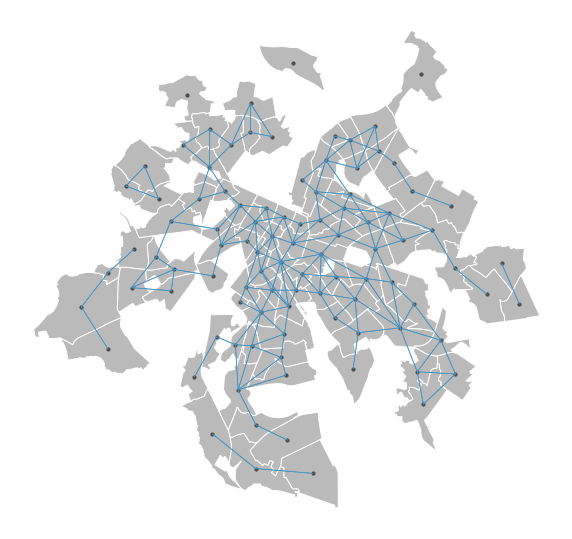

In [52]:
plot_spatial_weights(districts_weights, districts_joined)

In [53]:
weights.lag_spatial(districts_weights, districts_joined['fiscal_income'])

array([ 51725.,  61378.,  33634.,  21739.,  38239.,  21028.,  31423.,
            0.,      0.,  29427.,  32760.,  32211.,  29403.,      0.,
        37419.,  62507.,  41985.,  31575.,  51142.,  51271.,  13779.,
        74978.,  92379.,  50255.,  30643.,  54133.,  18184.,  61236.,
        26636.,  46742.,  68160., 105437.,  88710.,  85399.,  73156.,
        24317.,  82925.,  80345.,  57490.,  88114.,  65313.,  17674.,
        69876.,  85747., 127739.,  98697.,  72778.,  45768.,  31461.,
        95012.,  95176.,  84114.,  78331.,  28834.,  65661.,  42076.,
        75181.,  25634.,  19678.,  32001.,  11301.,  36736.,  33720.,
        26815.,  51628.,  40910.,  14763.,  16097.,  45593.,  16097.,
        18953.,  37213.,  97144.,  13917.,  37745.,  77477.,  30166.,
        90131.,  63151.,  65818.,  68547.,  39066.,  93151.,  87487.,
       111935.,  66479.,  62450.,  52774.,  34710.,  75224.,  49580.,
        71145.,  38548.,  54091.,  16706.,  21283.,  19709.])

In [54]:
districts_joined['lagged_fiscal_income'] = weights.lag_spatial(districts_weights, districts_joined['fiscal_income'])

In [55]:
districts_joined

ID  VERSIONID  MDRC                  NAME_FRE                 NAME_DUT  \
0    83          1    83                CONSCIENCE               CONSCIENCE   
1    80          1    80                    HELMET                   HELMET   
2    19          1    19        VIEUX LAEKEN OUEST           OUD LAKEN WEST   
3    20          1    20          VIEUX LAEKEN EST           OUD LAKEN OOST   
4    79          1    79                      PAIX                    VREDE   
..  ...        ...   ...                       ...                      ...   
92   93          1    93    BOULEVARD DE LA WOLUWE               WOLUWELAAN   
93  102          1   102                 TRANSVAAL                TRANSVAAL   
94   96          1    96                SAINT-PAUL              SINT-PAULUS   
95   94          1    94                   STOCKEL                  STOKKEL   
96   95          1    95  SAINTE-ALIX  - JOLI BOIS  SINTE-ALEIDIS - MOOIBOS   

                                        NAME_BIL        AREA  \
0                                     CONSCIENCE   469489.90   
1                                         HELMET   718634.24   
2            OUD LAKEN WEST / VIEUX LAEKEN OUEST   499645.52   
3              OUD LAKEN OOST / VIEUX LAEKEN EST  1040449.92   
4                                   VREDE / PAIX  1192000.59   
..                                           ...         ...   
92                               BD. WOLUWE LAAN  1062093.41   
93                                     TRANSVAAL  1220223.75   
94                                   ST-PAUL(US)  1782749.86   
95                             STOKKEL / STOCKEL  1516750.55   
96  ST-ALEIDIS - MOOIBOS / STE-ALIX  - JOLI BOIS   984128.27   

                     INSPIRE_ID  BEGIN_LIFE END_LIFE  \
0    BE.BRUSSELS.BRIC.ADM.MD.53  2015-10-05     None   
1    BE.BRUSSELS.BRIC.ADM.MD.54  2015-10-05     None   
2   BE.BRUSSELS.BRIC.ADM.MD.123  2015-10-05     None   
3    BE.BRUSSELS.BRIC.ADM.MD.66  2015-10-05     None   
4    BE.BRUSSELS.BRIC.ADM.MD.82  2015-10-05     None   
..                          ...         ...      ...   
92  BE.BRUSSELS.BRIC.ADM.MD.134  2015-10-05     None   
93   BE.BRUSSELS.BRIC.ADM.MD.39  2015-10-05     None   
94   BE.BRUSSELS.BRIC.ADM.MD.38  2015-10-05     None   
95  BE.BRUSSELS.BRIC.ADM.MD.135  2018-01-02     None   
96   BE.BRUSSELS.BRIC.ADM.MD.37  2018-01-02     None   

                                             geometry   code  \
0   POLYGON ((151836.566 173466.414, 151866.597 17...   83.0   
1   POLYGON ((150764.790 173563.033, 150805.931 17...   80.0   
2   POLYGON ((147858.070 174004.707, 147866.788 17...   19.0   
3   POLYGON ((148132.120 173445.561, 148132.121 17...   20.0   
4   POLYGON ((151359.565 174552.969, 151508.692 17...   79.0   
..                                                ...    ...   
92  POLYGON ((154061.592 169716.308, 154070.522 16...   93.0   
93  POLYGON ((154141.848 166873.686, 154174.689 16...  102.0   
94  POLYGON ((154884.558 169524.678, 154884.633 16...   96.0   
95  POLYGON ((156936.652 170326.070, 156932.309 17...   94.0   
96  POLYGON ((156832.202 169462.109, 156894.268 16...   95.0   

                   district  fiscal_income  monthly_rent  \
0                Conscience        12857.0         692.0   
1                    Helmet        11116.0         673.0   
2            Oud Laken West         9764.0         751.0   
3            Oud Laken Oost         8584.0         723.0   
4                     Vrede        12857.0         736.0   
..                      ...            ...           ...   
92               Woluwelaan        16706.0         926.0   
93                Transvaal        19420.0         758.0   
94              Sint-Paulus        21918.0         937.0   
95                  Stokkel        19709.0         952.0   
96  Sinte-Aleidis - Mooibos        21283.0        1113.0   

    perc_house_with_central_heating  lagged_fiscal_income  
0                             73.11               51725.0  
1   

<AxesSubplot:>

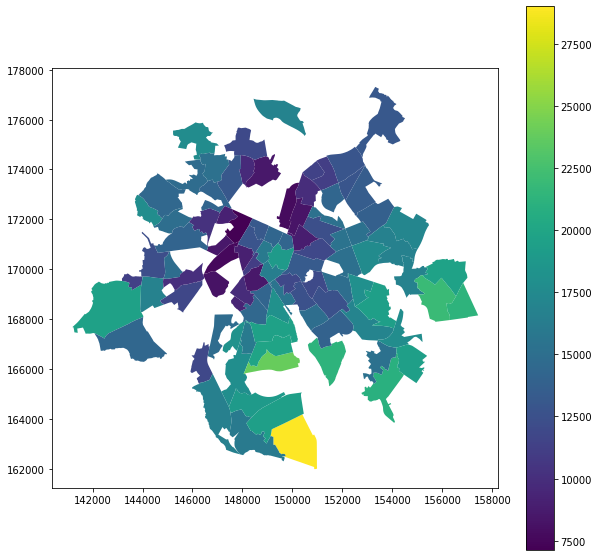

In [56]:
districts_joined.plot(column = 'fiscal_income', figsize = [10, 10], legend = True)

<AxesSubplot:>

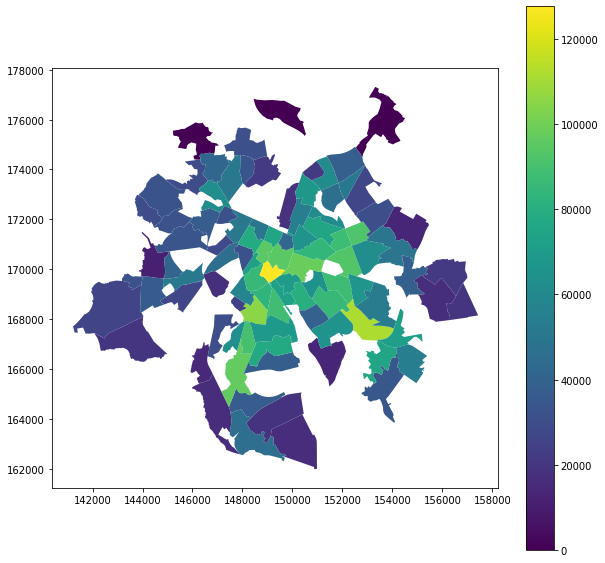

In [57]:
districts_joined.plot(column = 'lagged_fiscal_income', figsize = [10, 10], legend = True)

In [66]:
districts_weights['CONSCIENCE']

{'VREDE / PAIX': 1.0,
 'TERDELT': 1.0,
 'HELMET': 1.0,
 'AVENUE LEOPOLD III LAAN': 1.0}

In [67]:
districts_weights.mean_neighbors

3.6082474226804124

In [90]:
districts_weights.transform

'R'

In [69]:
districts_weights.transform = 'R'

('WARNING: ', 'HAREN', ' is an island (no neighbors)')
('WARNING: ', 'MUTSAARD', ' is an island (no neighbors)')
('WARNING: ', 'HEYMBOSCH - AZ-JETTE', ' is an island (no neighbors)')


In [70]:
districts_weights['CONSCIENCE']

{'VREDE / PAIX': 0.25,
 'TERDELT': 0.25,
 'HELMET': 0.25,
 'AVENUE LEOPOLD III LAAN': 0.25}

In [72]:
districts_joined['lagged_fiscal_income'] = weights.lag_spatial(districts_weights, districts_joined['fiscal_income'])

In [106]:
chart = alt.Chart(districts_joined)
chart.mark_point().encode(
    x = 'fiscal_income',
    y = 'lagged_fiscal_income'
)

alt.Chart(...)

<AxesSubplot:>

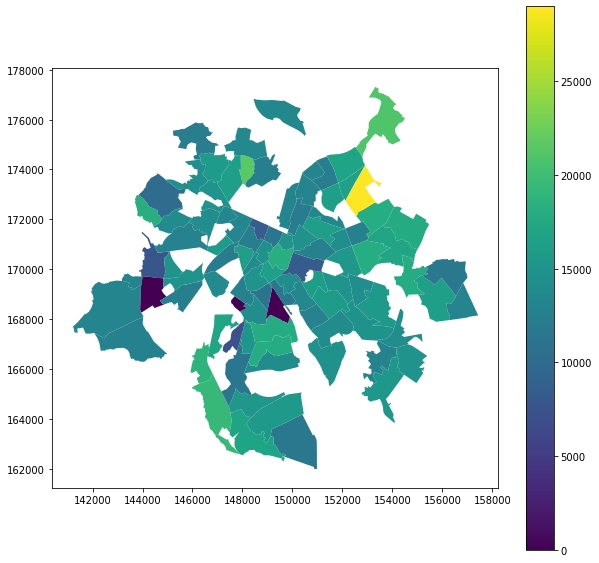

In [73]:
districts_joined.plot(column = 'lagged_fiscal_income', figsize = [10, 10], legend = True)

<AxesSubplot:>

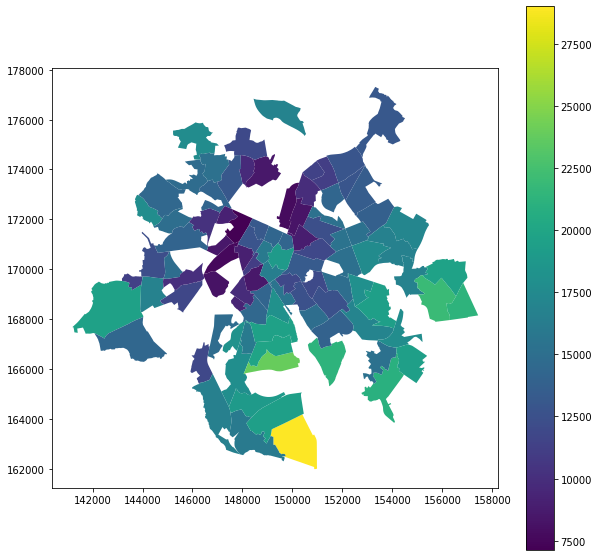

In [76]:
districts_joined.plot(column = 'fiscal_income', figsize = [10, 10], legend = True)

In [78]:
districts_joined['monthly_rent'].corr(pd.Series(weights.lag_spatial(districts_weights, districts_joined['monthly_rent'])))

0.08652454076237204

In [120]:
morans_i = esda.Moran(districts_joined['fiscal_income'], districts_weights)
morans_i.I, morans_i.p_sim

(0.04487339354139269, 0.265)

In [112]:
districts_weights_distance = weights.DistanceBand.from_dataframe(districts_joined, 2500)  # generate spatial weights (distance-based in this case)

In [119]:
morans_i = esda.Moran(districts_joined['monthly_rent'], districts_weights_distance)
morans_i.I, morans_i.p_sim

(0.4562710057628412, 0.001)

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

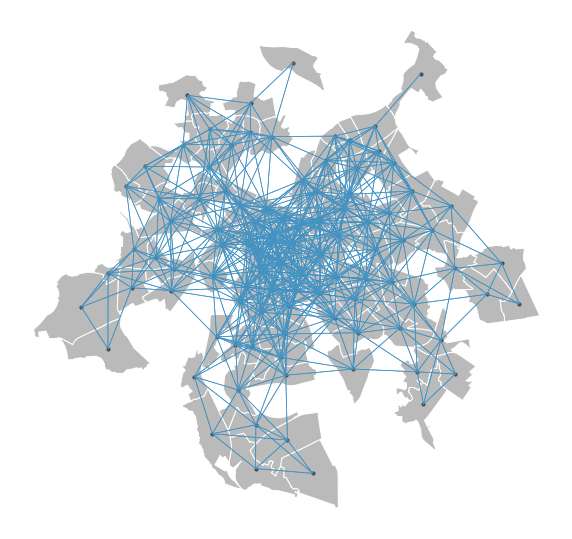

In [114]:
plot_spatial_weights(districts_weights_distance, districts_joined)

In [115]:
districts_joined['lagged_distance_fiscal_income'] = weights.lag_spatial(districts_weights_distance, districts_joined['fiscal_income'])

In [116]:
chart = alt.Chart(districts_joined)
chart.mark_point().encode(
    x = 'fiscal_income',
    y = 'lagged_distance_fiscal_income'
)

alt.Chart(...)

<AxesSubplot:>

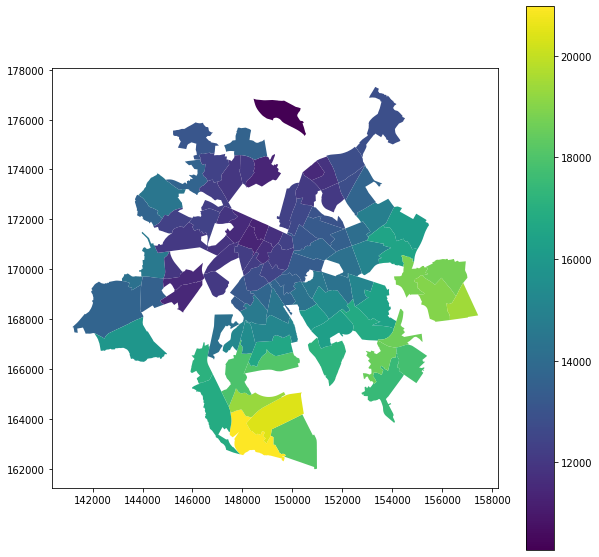

In [117]:
districts_joined.plot(column = 'lagged_distance_fiscal_income', figsize = [10, 10], legend = True)